In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# Datasets

## English-dutch dataset

In [40]:
# Retrive dataset for training.
# utf-8 protects special charecters hence it's useful for reading in dutch and english.

def readfile(filename):
  with open(filename, 'r', encoding = "utf-8") as f:
    lines = f.readlines() # split each line
  # Cleaning the lines to ensure that there are no leading spaces, \n's, or empty lines.
  cleaned_lines = []
  for line in lines:
    new_line = line.strip()
    cleaned_lines.append(new_line)
  return cleaned_lines


# Read in files for dutch and english
dutch_text = readfile('dutch.txt')
english_text = readfile('english.txt')

# Adding labels to signify if the text is dutch. Dutch is 0.
# labels and text are temperarly stored as a tuple.
dutch_labeled = []
for sentence in dutch_text:
  dutch_labeled.append((sentence,0))
print("dutch_labeled: ", dutch_labeled)

# Adding labels for english. English is 1
english_labeled = []
for sentence in english_text:
  english_labeled.append((sentence,1))
print("english_labeled: ",english_labeled)

# Combine both together with thier new labels
language_df = dutch_labeled + english_labeled

# Sepreates the tuple into two vectors where Y is the label
X_language_train, Y_language_train = zip(*language_df)

# Shuffle the training set.
X_language_train, Y_language_train = shuffle(X_language_train, Y_language_train, random_state=0)

dutch_labeled:  [('UNIVERSELE VERKLARING VAN DE RECHTEN VAN DE MENS Preambule', 0), ('Overgegende dat erkenning van de inherente waardigheid en van de gelijke en onvervreemdbare rechten van alle leden van de mensengemeenschap grondslag is voor de vrijheid , gerechtigheid en vrede in de wereld ;', 0), ('Overgegende dat terzijdestelling van en minachting voor de rechten van de mens geleid hebben tot barbaarse handelingen , die het geweten van de mensheid geweld hebben aangedaan en dat de komst van een wereld , waarin de mensen vrijheid van meningsuiting en geloof zullen genieten , en vrij zullen zijn van vrees en gebrek , is verkondigd als het hoogste ideaal van iedere mens ;', 0), ('Overgegende dat het van het grootste belang is , dat de rechten van de mens beschermd worden door de suprematie van het recht , opdat de mens niet gedwongen worde om in laatste instantie zijn toevlucht te nemen tot opstand tegen tyrannie en onderdrukking ;', 0), ('Overgegende dat het van het grootste belang 

In [41]:

# TESTING AND DEV DATASET
Dutch_test_valid = readfile('Dutch_test_valid.txt')
English_test_valid = readfile('English_test_valid.txt')

# Randomize to get 40 lines. Thus in a way it's already been shuffled.
dutch_random = random.sample(Dutch_test_valid, 40)
english_random = random.sample(English_test_valid, 40)

# Create develpment set for dutch
X_dev_dutch = dutch_random[:20]
Y_dev_dutch = [0] * 20

# Create develpment set for english
X_dev_english = english_random[:20]
Y_dev_english = [1] * 20

# Combine for development set
X_language_dev = X_dev_dutch + X_dev_english
Y_language_dev = Y_dev_dutch + Y_dev_english

# Create test set for dutch
X_test_dutch = dutch_random[20:]
Y_test_dutch = [0] * 20

# Create test set for english
X_test_english = english_random[20:]
Y_test_english = [1] * 20

# Combine to create test set
X_language_test = X_test_dutch + X_test_english
Y_language_test = Y_test_dutch + Y_test_english

# Feature Engineering

## Feature 1:

In [42]:
# This one makes each word a feature.
# It counts the number of times each word appears in the sentence.
# Works well to differentiate English vs Dutch because certain words are language-specific.
# VECTORIZING so the text turns into vectors of numbers.

# Turning labels into an array. Vectorizing is not needed here as the labels are already set to 1's and 0's
y_train = np.array(Y_language_train)
y_dev = np.array(Y_language_dev)
y_test = np.array(Y_language_test)

# Only need to vectorize the X set
vectorizer = CountVectorizer()

X_train_lang_vec = vectorizer.fit_transform(X_language_train).toarray()  # convert to dense array
X_dev_lang_vec   = vectorizer.transform(X_language_dev).toarray()
X_test_lang_vec  = vectorizer.transform(X_language_test).toarray()

## Feature 2

In [43]:
# Function that counts the number of reapeated vowles.
# The logic here is that Dutch has more double vowels then English.
def repeated_vowel_features(sentence):
    vowels = ['aa', 'ee', 'ii', 'oo', 'uu']
    sentence = sentence.lower()
    return [sentence.count(v) for v in vowels]

# Get new training, dev and test set using the new feature.
repeated_vowel_train = np.array([repeated_vowel_features(s) for s in X_language_train])
repeated_vowel_dev   = np.array([repeated_vowel_features(s) for s in X_language_dev])
repeated_vowel_test  = np.array([repeated_vowel_features(s) for s in X_language_test])

## Feature 3

In [44]:
# This combines the above two features to check if it would increase the accuracy.
X_train_combined = np.hstack([X_train_lang_vec, repeated_vowel_train])
X_dev_combined   = np.hstack([X_dev_lang_vec, repeated_vowel_dev])
X_test_combined  = np.hstack([X_test_lang_vec, repeated_vowel_test])

print(X_train_combined.shape)  # Should be (num_train_samples, num_words + 5)

(138, 1092)


# Support Vector Machine (SVM) for Language dataset


In [45]:
# SVM with bag-of-words features only
print("Bag-of-words only--------------------------------------------------------")
for C in [0.01, 0.1, 1, 10, 100]:
  print(f"------------------- C = {C} -----------------")
  for max_iter in [0, 50, 500, 1000]:
    print(f"Model run for a maximum iteration of {max_iter}")
    lang_svm_bow = LinearSVC(C=C, max_iter = max_iter)
    lang_svm_bow.fit(X_train_lang_vec, y_train)

    y_pred_train_bow = lang_svm_bow.predict(X_train_lang_vec)
    y_pred_dev_bow   = lang_svm_bow.predict(X_dev_lang_vec)
    y_pred_test_bow  = lang_svm_bow.predict(X_test_lang_vec)


    print("Train accuracy:", accuracy_score(y_train, y_pred_train_bow))
    print("Dev accuracy:", accuracy_score(y_dev, y_pred_dev_bow))
    print("Test accuracy:", accuracy_score(y_test, y_pred_test_bow))
    print("Test confusion matrix:\n", confusion_matrix(y_test, y_pred_test_bow))
    print()


Bag-of-words only--------------------------------------------------------
------------------- C = 0.01 -----------------
Model run for a maximum iteration of 0
Train accuracy: 0.5072463768115942
Dev accuracy: 0.5
Test accuracy: 0.5
Test confusion matrix:
 [[20  0]
 [20  0]]

Model run for a maximum iteration of 50
Train accuracy: 1.0
Dev accuracy: 0.925
Test accuracy: 0.925
Test confusion matrix:
 [[20  0]
 [ 3 17]]

Model run for a maximum iteration of 500
Train accuracy: 1.0
Dev accuracy: 0.925
Test accuracy: 0.925
Test confusion matrix:
 [[20  0]
 [ 3 17]]

Model run for a maximum iteration of 1000
Train accuracy: 1.0
Dev accuracy: 0.925
Test accuracy: 0.925
Test confusion matrix:
 [[20  0]
 [ 3 17]]

------------------- C = 0.1 -----------------
Model run for a maximum iteration of 0
Train accuracy: 0.5072463768115942
Dev accuracy: 0.5
Test accuracy: 0.5
Test confusion matrix:
 [[20  0]
 [20  0]]

Model run for a maximum iteration of 50
Train accuracy: 1.0
Dev accuracy: 0.925
Test 

/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Train accuracy: 1.0
Dev accuracy: 0.95
Test accuracy: 1.0
Test confusion matrix:
 [[20  0]
 [ 0 20]]



/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


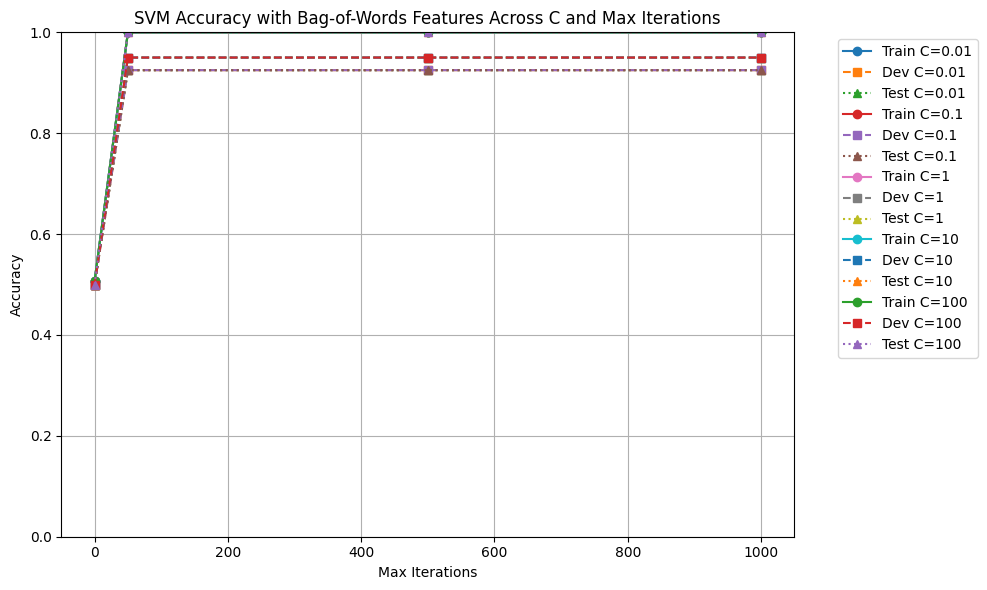

In [46]:
# GRAPH version
results = {}

for C in [0.01, 0.1, 1, 10, 100]:
    results[C] = {"train": [], "dev": [], "test": []}
    for max_iter in [0, 50, 500, 1000]:
        lang_svm_bow = LinearSVC(C=C, max_iter=max_iter)
        lang_svm_bow.fit(X_train_lang_vec, y_train)

        y_pred_train_bow = lang_svm_bow.predict(X_train_lang_vec)
        y_pred_dev_bow   = lang_svm_bow.predict(X_dev_lang_vec)
        y_pred_test_bow  = lang_svm_bow.predict(X_test_lang_vec)

        results[C]["train"].append(accuracy_score(y_train, y_pred_train_bow))
        results[C]["dev"].append(accuracy_score(y_dev, y_pred_dev_bow))
        results[C]["test"].append(accuracy_score(y_test, y_pred_test_bow))

# Plotting combined graph
max_iters = [0, 50, 500, 1000]
plt.figure(figsize=(10,6))

for C in results:
    plt.plot(max_iters, results[C]["train"], marker='o', label=f"Train C={C}")
    plt.plot(max_iters, results[C]["dev"], marker='s', linestyle='--', label=f"Dev C={C}")
    plt.plot(max_iters, results[C]["test"], marker='^', linestyle=':', label=f"Test C={C}")

plt.title("SVM Accuracy with Bag-of-Words Features Across C and Max Iterations")
plt.xlabel("Max Iterations")
plt.ylabel("Accuracy")
plt.ylim(0,1)
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Put legend outside
plt.tight_layout()
plt.show()


In [47]:
# Combined with bag of words AND repeated vowles.
print("Repeated vowles combined with bag-of-words only--------------------------------------------------------")
for C in [0.01, 0.1, 1, 10, 100]:
  print(f"------------------- C = {C} -----------------")
  for max_iter in [0, 50, 500, 1000]:
    print(f"Model run for a maximum iteration of {max_iter}")
    lang_svm_model_f2 = LinearSVC(C=C, max_iter = max_iter)
    lang_svm_model_f2.fit(X_train_combined, y_train)

    y_pred_train_f2 = lang_svm_model_f2.predict(X_train_combined)
    y_pred_dev_f2 = lang_svm_model_f2.predict(X_dev_combined)
    y_pred_test_f2 = lang_svm_model_f2.predict(X_test_combined)

    print("Train accuracy:", accuracy_score(y_train, y_pred_train_f2))
    print("Dev accuracy:", accuracy_score(y_dev, y_pred_dev_f2))
    print("Test accuracy:", accuracy_score(y_test, y_pred_test_f2))
    print("Test confusion matrix:\n", confusion_matrix(y_test, y_pred_test_f2))
    print()

Repeated vowles combined with bag-of-words only--------------------------------------------------------
------------------- C = 0.01 -----------------
Model run for a maximum iteration of 0
Train accuracy: 0.5072463768115942
Dev accuracy: 0.5
Test accuracy: 0.5
Test confusion matrix:
 [[20  0]
 [20  0]]

Model run for a maximum iteration of 50
Train accuracy: 1.0
Dev accuracy: 0.95
Test accuracy: 0.95
Test confusion matrix:
 [[20  0]
 [ 2 18]]

Model run for a maximum iteration of 500
Train accuracy: 1.0
Dev accuracy: 0.95
Test accuracy: 0.95
Test confusion matrix:
 [[20  0]
 [ 2 18]]

Model run for a maximum iteration of 1000
Train accuracy: 1.0
Dev accuracy: 0.95
Test accuracy: 0.95
Test confusion matrix:
 [[20  0]
 [ 2 18]]

------------------- C = 0.1 -----------------
Model run for a maximum iteration of 0
Train accuracy: 0.5072463768115942
Dev accuracy: 0.5
Test accuracy: 0.5
Test confusion matrix:
 [[20  0]
 [20  0]]

Model run for a maximum iteration of 50
Train accuracy: 1.0
D

/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Train accuracy: 1.0
Dev accuracy: 0.925
Test accuracy: 0.975
Test confusion matrix:
 [[20  0]
 [ 1 19]]

Model run for a maximum iteration of 500
Train accuracy: 1.0
Dev accuracy: 0.925
Test accuracy: 0.975
Test confusion matrix:
 [[20  0]
 [ 1 19]]

Model run for a maximum iteration of 1000
Train accuracy: 1.0
Dev accuracy: 0.925
Test accuracy: 0.975
Test confusion matrix:
 [[20  0]
 [ 1 19]]

------------------- C = 10 -----------------
Model run for a maximum iteration of 0
Train accuracy: 0.5072463768115942
Dev accuracy: 0.5
Test accuracy: 0.5
Test confusion matrix:
 [[20  0]
 [20  0]]

Model run for a maximum iteration of 50
Train accuracy: 1.0
Dev accuracy: 0.925
Test accuracy: 0.975
Test confusion matrix:
 [[20  0]
 [ 1 19]]

Model run for a maximum iteration of 500
Train accuracy: 1.0
Dev accuracy: 0.925
Test accuracy: 0.975
Test confusion matrix:
 [[20  0]
 [ 1 19]]

Model run for a maximum iteration of 1000
Train accuracy: 1.0
Dev accuracy: 0.925
Test accuracy: 0.975
Test con

/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


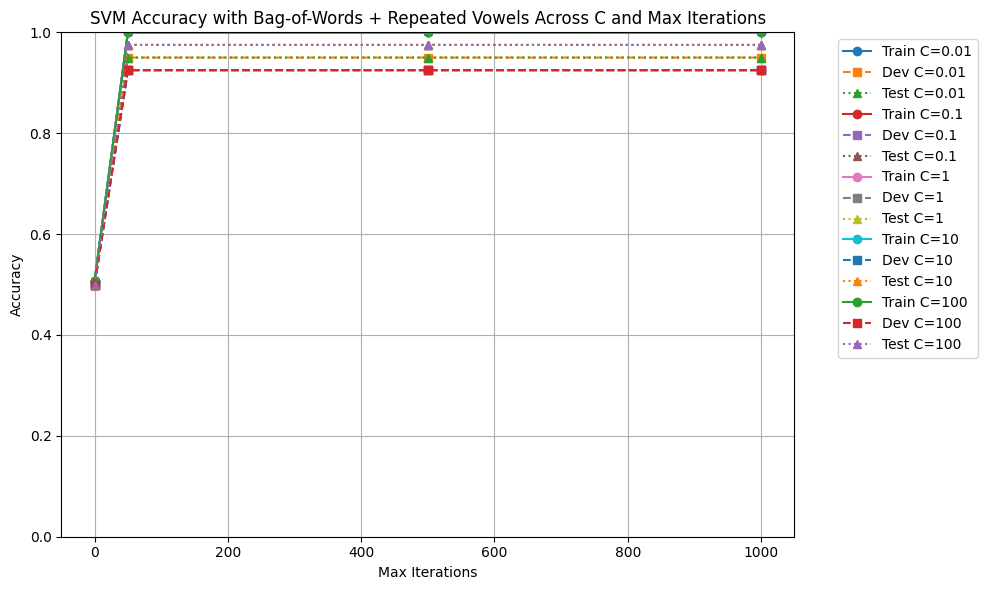

In [48]:
# GRAPH version
results_combined = {}

for C in [0.01, 0.1, 1, 10, 100]:
    results_combined[C] = {"train": [], "dev": [], "test": []}
    for max_iter in [0, 50, 500, 1000]:
        lang_svm_model_f2 = LinearSVC(C=C, max_iter=max_iter)
        lang_svm_model_f2.fit(X_train_combined, y_train)

        y_pred_train_f2 = lang_svm_model_f2.predict(X_train_combined)
        y_pred_dev_f2 = lang_svm_model_f2.predict(X_dev_combined)
        y_pred_test_f2 = lang_svm_model_f2.predict(X_test_combined)

        results_combined[C]["train"].append(accuracy_score(y_train, y_pred_train_f2))
        results_combined[C]["dev"].append(accuracy_score(y_dev, y_pred_dev_f2))
        results_combined[C]["test"].append(accuracy_score(y_test, y_pred_test_f2))

# Plotting combined graph
max_iters = [0, 50, 500, 1000]
plt.figure(figsize=(10,6))

for C in results_combined:
    plt.plot(max_iters, results_combined[C]["train"], marker='o', label=f"Train C={C}")
    plt.plot(max_iters, results_combined[C]["dev"], marker='s', linestyle='--', label=f"Dev C={C}")
    plt.plot(max_iters, results_combined[C]["test"], marker='^', linestyle=':', label=f"Test C={C}")

plt.title("SVM Accuracy with Bag-of-Words + Repeated Vowels Across C and Max Iterations")
plt.xlabel("Max Iterations")
plt.ylabel("Accuracy")
plt.ylim(0,1)
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Legend outside
plt.tight_layout()
plt.show()

In [49]:
# Repeated Vowles common to dutch
print("Repeated vowles only--------------------------------------------------------")
for C in [0.01, 0.1, 1, 10, 100]:
  print(f"------------------- C = {C} -----------------")
  for max_iter in [0, 50, 500, 1000]:
    print(f"Model run for a maximum iteration of {max_iter}")
    lang_svm_vowel = LinearSVC(C=C, max_iter=max_iter)
    lang_svm_vowel.fit(repeated_vowel_train, y_train)

    y_pred_train_vowel = lang_svm_vowel.predict(repeated_vowel_train)
    y_pred_dev_vowel   = lang_svm_vowel.predict(repeated_vowel_dev)
    y_pred_test_vowel  = lang_svm_vowel.predict(repeated_vowel_test)

    print("Train accuracy:", accuracy_score(y_train, y_pred_train_vowel))
    print("Dev accuracy:", accuracy_score(y_dev, y_pred_dev_vowel))
    print("Test accuracy:", accuracy_score(y_test, y_pred_test_vowel))
    print("Test confusion matrix:\n", confusion_matrix(y_test, y_pred_test_vowel))
    print()

Repeated vowles only--------------------------------------------------------
------------------- C = 0.01 -----------------
Model run for a maximum iteration of 0
Train accuracy: 0.5072463768115942
Dev accuracy: 0.5
Test accuracy: 0.5
Test confusion matrix:
 [[20  0]
 [20  0]]

Model run for a maximum iteration of 50
Train accuracy: 0.8260869565217391
Dev accuracy: 0.675
Test accuracy: 0.675
Test confusion matrix:
 [[ 8 12]
 [ 1 19]]

Model run for a maximum iteration of 500
Train accuracy: 0.8260869565217391
Dev accuracy: 0.675
Test accuracy: 0.675
Test confusion matrix:
 [[ 8 12]
 [ 1 19]]

Model run for a maximum iteration of 1000
Train accuracy: 0.8260869565217391
Dev accuracy: 0.675
Test accuracy: 0.675
Test confusion matrix:
 [[ 8 12]
 [ 1 19]]

------------------- C = 0.1 -----------------
Model run for a maximum iteration of 0
Train accuracy: 0.5072463768115942
Dev accuracy: 0.5
Test accuracy: 0.5
Test confusion matrix:
 [[20  0]
 [20  0]]

Model run for a maximum iteration of 

/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Train accuracy: 0.5072463768115942
Dev accuracy: 0.5
Test accuracy: 0.5
Test confusion matrix:
 [[20  0]
 [20  0]]

Model run for a maximum iteration of 50
Train accuracy: 0.8260869565217391
Dev accuracy: 0.65
Test accuracy: 0.675
Test confusion matrix:
 [[ 7 13]
 [ 0 20]]

Model run for a maximum iteration of 500
Train accuracy: 0.8260869565217391
Dev accuracy: 0.65
Test accuracy: 0.675
Test confusion matrix:
 [[ 7 13]
 [ 0 20]]

Model run for a maximum iteration of 1000
Train accuracy: 0.8260869565217391
Dev accuracy: 0.65
Test accuracy: 0.675
Test confusion matrix:
 [[ 7 13]
 [ 0 20]]



/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


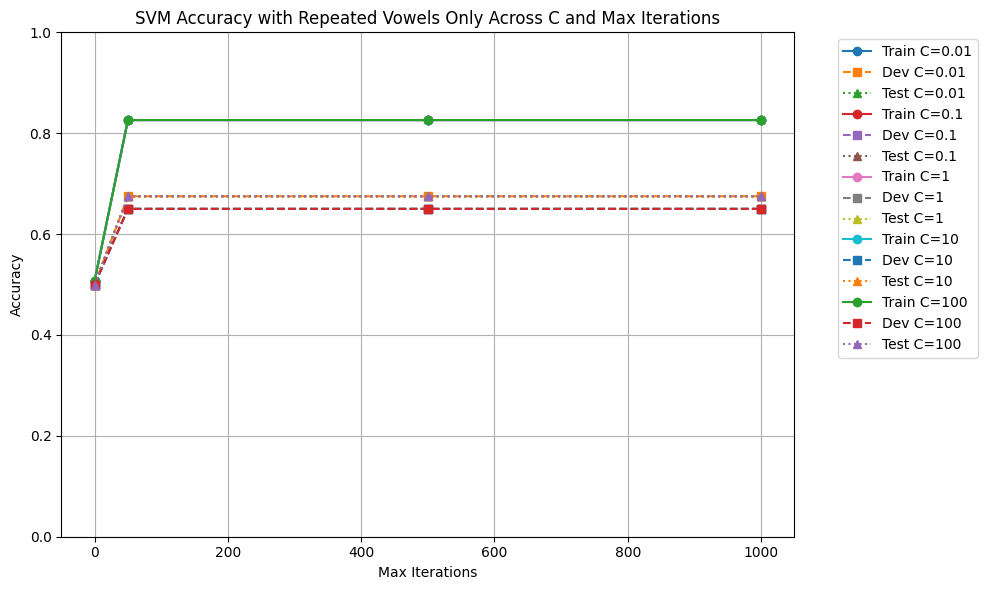

In [50]:
# GRAPH version
results_vowel = {}

for C in [0.01, 0.1, 1, 10, 100]:
    results_vowel[C] = {"train": [], "dev": [], "test": []}
    for max_iter in [0, 50, 500, 1000]:
        lang_svm_vowel = LinearSVC(C=C, max_iter=max_iter)
        lang_svm_vowel.fit(repeated_vowel_train, y_train)

        y_pred_train_vowel = lang_svm_vowel.predict(repeated_vowel_train)
        y_pred_dev_vowel   = lang_svm_vowel.predict(repeated_vowel_dev)
        y_pred_test_vowel  = lang_svm_vowel.predict(repeated_vowel_test)

        results_vowel[C]["train"].append(accuracy_score(y_train, y_pred_train_vowel))
        results_vowel[C]["dev"].append(accuracy_score(y_dev, y_pred_dev_vowel))
        results_vowel[C]["test"].append(accuracy_score(y_test, y_pred_test_vowel))

# Plotting combined graph
max_iters = [0, 50, 500, 1000]
plt.figure(figsize=(10,6))

for C in results_vowel:
    plt.plot(max_iters, results_vowel[C]["train"], marker='o', label=f"Train C={C}")
    plt.plot(max_iters, results_vowel[C]["dev"], marker='s', linestyle='--', label=f"Dev C={C}")
    plt.plot(max_iters, results_vowel[C]["test"], marker='^', linestyle=':', label=f"Test C={C}")

plt.title("SVM Accuracy with Repeated Vowels Only Across C and Max Iterations")
plt.xlabel("Max Iterations")
plt.ylabel("Accuracy")
plt.ylim(0,1)
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Legend outside
plt.tight_layout()
plt.show()

# Logistic Regression for Language dataset

In [51]:
print("Bag-of-words only--------------------------------------------------------")

for penalty in ['l1', 'l2']:
  print(f"----------------- Penalty: {penalty.upper()} Regularization -------------------------------------------------------")
  if penalty == 'l1':
    solver = 'liblinear'
  else:
    solver = 'lbfgs'

  for C in [0.01, 0.1, 1, 10, 100]:
    print(f"------------------- C = {C} -----------------")
    for max_iter in [0, 50, 500, 1000]:
      print(f"Model run for a maximum iteration of {max_iter}")
      logreg_bow = LogisticRegression(penalty = penalty, solver = solver, C=C,max_iter=max_iter)  # increase max_iter for convergence
      logreg_bow.fit(X_train_lang_vec, y_train)

      y_pred_train_bow = logreg_bow.predict(X_train_lang_vec)
      y_pred_dev_bow   = logreg_bow.predict(X_dev_lang_vec)
      y_pred_test_bow  = logreg_bow.predict(X_test_lang_vec)

      print("Train accuracy:", accuracy_score(y_train, y_pred_train_bow))
      print("Dev accuracy:", accuracy_score(y_dev, y_pred_dev_bow))
      print("Test accuracy:", accuracy_score(y_test, y_pred_test_bow))
      print("Test confusion matrix:\n", confusion_matrix(y_test, y_pred_test_bow))
      print()


Bag-of-words only--------------------------------------------------------
----------------- Penalty: L1 Regularization -------------------------------------------------------
------------------- C = 0.01 -----------------
Model run for a maximum iteration of 0
Train accuracy: 0.5072463768115942
Dev accuracy: 0.5
Test accuracy: 0.5
Test confusion matrix:
 [[20  0]
 [20  0]]

Model run for a maximum iteration of 50
Train accuracy: 0.5072463768115942
Dev accuracy: 0.5
Test accuracy: 0.5
Test confusion matrix:
 [[20  0]
 [20  0]]

Model run for a maximum iteration of 500
Train accuracy: 0.5072463768115942
Dev accuracy: 0.5
Test accuracy: 0.5
Test confusion matrix:
 [[20  0]
 [20  0]]

Model run for a maximum iteration of 1000
Train accuracy: 0.5072463768115942
Dev accuracy: 0.5
Test accuracy: 0.5
Test confusion matrix:
 [[20  0]
 [20  0]]

------------------- C = 0.1 -----------------
Model run for a maximum iteration of 0
Train accuracy: 0.5072463768115942
Dev accuracy: 0.5
Test accuracy:

/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF 

Train accuracy: 1.0
Dev accuracy: 0.875
Test accuracy: 0.9
Test confusion matrix:
 [[20  0]
 [ 4 16]]

Model run for a maximum iteration of 500
Train accuracy: 1.0
Dev accuracy: 0.875
Test accuracy: 0.9
Test confusion matrix:
 [[20  0]
 [ 4 16]]

Model run for a maximum iteration of 1000
Train accuracy: 1.0
Dev accuracy: 0.875
Test accuracy: 0.9
Test confusion matrix:
 [[20  0]
 [ 4 16]]

------------------- C = 0.1 -----------------
Model run for a maximum iteration of 0
Train accuracy: 1.0
Dev accuracy: 0.975
Test accuracy: 1.0
Test confusion matrix:
 [[20  0]
 [ 0 20]]

Model run for a maximum iteration of 50
Train accuracy: 1.0
Dev accuracy: 0.875
Test accuracy: 0.925
Test confusion matrix:
 [[20  0]
 [ 3 17]]

Model run for a maximum iteration of 500
Train accuracy: 1.0
Dev accuracy: 0.875
Test accuracy: 0.925
Test confusion matrix:
 [[20  0]
 [ 3 17]]

Model run for a maximum iteration of 1000
Train accuracy: 1.0
Dev accuracy: 0.875
Test accuracy: 0.925
Test confusion matrix:
 [[

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Train accuracy: 1.0
Dev accuracy: 0.875
Test accuracy: 0.925
Test confusion matrix:
 [[20  0]
 [ 3 17]]

Model run for a maximum iteration of 1000
Train accuracy: 1.0
Dev accuracy: 0.875
Test accuracy: 0.925
Test confusion matrix:
 [[20  0]
 [ 3 17]]

------------------- C = 10 -----------------
Model run for a maximum iteration of 0
Train accuracy: 1.0
Dev accuracy: 0.975
Test accuracy: 1.0
Test confusion matrix:
 [[20  0]
 [ 0 20]]

Model run for a maximum iteration of 50
Train accuracy: 1.0
Dev accuracy: 0.925
Test accuracy: 0.925
Test confusion matrix:
 [[20  0]
 [ 3 17]]

Model run for a maximum iteration of 500
Train accuracy: 1.0
Dev accuracy: 0.925
Test accuracy: 0.925
Test confusion matrix:
 [[20  0]
 [ 3 17]]

Model run for a maximum iteration of 1000
Train accuracy: 1.0
Dev accuracy: 0.925
Test accuracy: 0.925
Test confusion matrix:
 [[20  0]
 [ 3 17]]

------------------- C = 100 -----------------
Model run for a maximum iteration of 0
Train accuracy: 1.0
Dev accuracy: 0.97

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF 

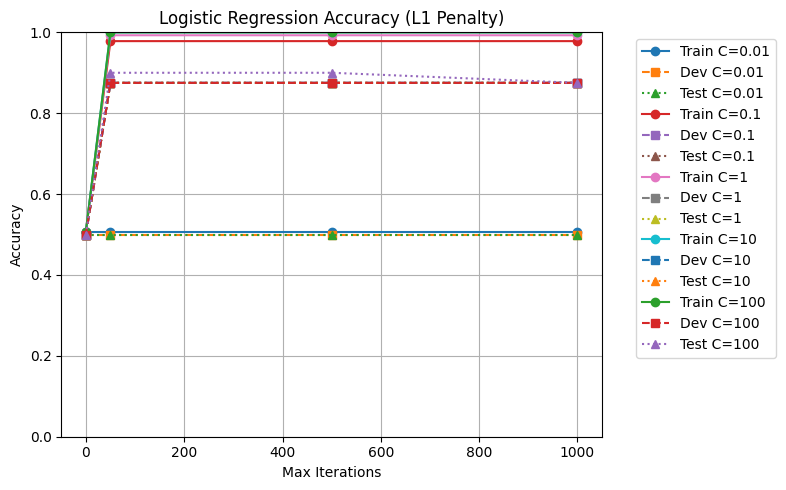

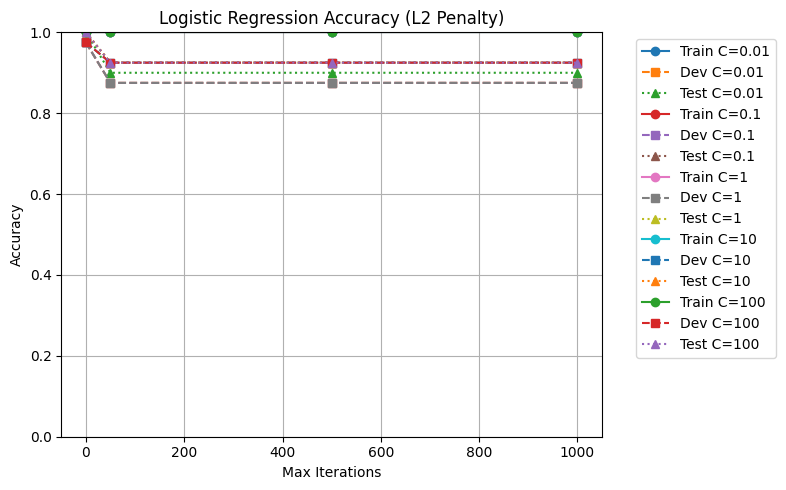

In [52]:
# graph version
results_bow = {}

for penalty in ['l1', 'l2']:
    results_bow[penalty] = {}
    solver = 'liblinear' if penalty == 'l1' else 'lbfgs'

    for C in [0.01, 0.1, 1, 10, 100]:
        results_bow[penalty][C] = {"train": [], "dev": [], "test": []}
        for max_iter in [0, 50, 500, 1000]:
            logreg_bow = LogisticRegression(penalty=penalty, solver=solver, C=C, max_iter=max_iter)
            logreg_bow.fit(X_train_lang_vec, y_train)

            y_pred_train_bow = logreg_bow.predict(X_train_lang_vec)
            y_pred_dev_bow   = logreg_bow.predict(X_dev_lang_vec)
            y_pred_test_bow  = logreg_bow.predict(X_test_lang_vec)

            results_bow[penalty][C]["train"].append(accuracy_score(y_train, y_pred_train_bow))
            results_bow[penalty][C]["dev"].append(accuracy_score(y_dev, y_pred_dev_bow))
            results_bow[penalty][C]["test"].append(accuracy_score(y_test, y_pred_test_bow))

max_iters = [0, 50, 500, 1000]

for penalty in ['l1', 'l2']:
    plt.figure(figsize=(8,5))
    for C in results_bow[penalty]:
        plt.plot(max_iters, results_bow[penalty][C]["train"], marker='o', label=f"Train C={C}")
        plt.plot(max_iters, results_bow[penalty][C]["dev"], marker='s', linestyle='--', label=f"Dev C={C}")
        plt.plot(max_iters, results_bow[penalty][C]["test"], marker='^', linestyle=':', label=f"Test C={C}")

    plt.title(f"Logistic Regression Accuracy ({penalty.upper()} Penalty)")
    plt.xlabel("Max Iterations")
    plt.ylabel("Accuracy")
    plt.ylim(0,1)
    plt.grid(True)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

In [53]:
print("Repeated vowles only--------------------------------------------------------")
for penalty in ['l1', 'l2']:
  print(f"----------------- Penalty: {penalty.upper()} Regularization -------------------------------------------------------")
  if penalty == 'l1':
    solver = 'liblinear'
  else:
    solver = 'lbfgs'
  for C in [0.01, 0.1, 1, 10, 100]:
    print(f"------------------- C = {C} -----------------")
    for max_iter in [0, 50, 500, 1000]:
      print(f"Model run for a maximum iteration of {max_iter}")
      logreg_vowel = LogisticRegression(penalty = penalty, solver = solver, C=C, max_iter = max_iter)
      logreg_vowel.fit(repeated_vowel_train, y_train)

      y_pred_train_vowel = logreg_vowel.predict(repeated_vowel_train)
      y_pred_dev_vowel   = logreg_vowel.predict(repeated_vowel_dev)
      y_pred_test_vowel  = logreg_vowel.predict(repeated_vowel_test)

      print("Train accuracy:", accuracy_score(y_train, y_pred_train_vowel))
      print("Dev accuracy:", accuracy_score(y_dev, y_pred_dev_vowel))
      print("Test accuracy:", accuracy_score(y_test, y_pred_test_vowel))
      print("Test confusion matrix:\n", confusion_matrix(y_test, y_pred_test_vowel))
      print()


Repeated vowles only--------------------------------------------------------
----------------- Penalty: L1 Regularization -------------------------------------------------------
------------------- C = 0.01 -----------------
Model run for a maximum iteration of 0
Train accuracy: 0.5072463768115942
Dev accuracy: 0.5
Test accuracy: 0.5
Test confusion matrix:
 [[20  0]
 [20  0]]

Model run for a maximum iteration of 50
Train accuracy: 0.5072463768115942
Dev accuracy: 0.5
Test accuracy: 0.5
Test confusion matrix:
 [[20  0]
 [20  0]]

Model run for a maximum iteration of 500
Train accuracy: 0.5072463768115942
Dev accuracy: 0.5
Test accuracy: 0.5
Test confusion matrix:
 [[20  0]
 [20  0]]

Model run for a maximum iteration of 1000
Train accuracy: 0.5072463768115942
Dev accuracy: 0.5
Test accuracy: 0.5
Test confusion matrix:
 [[20  0]
 [20  0]]

------------------- C = 0.1 -----------------
Model run for a maximum iteration of 0
Train accuracy: 0.5072463768115942
Dev accuracy: 0.5
Test accura

/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF 

Train accuracy: 0.8115942028985508
Dev accuracy: 0.6
Test accuracy: 0.6
Test confusion matrix:
 [[ 4 16]
 [ 0 20]]

------------------- C = 0.1 -----------------
Model run for a maximum iteration of 0
Train accuracy: 0.5072463768115942
Dev accuracy: 0.5
Test accuracy: 0.5
Test confusion matrix:
 [[20  0]
 [20  0]]

Model run for a maximum iteration of 50
Train accuracy: 0.8115942028985508
Dev accuracy: 0.65
Test accuracy: 0.625
Test confusion matrix:
 [[ 5 15]
 [ 0 20]]

Model run for a maximum iteration of 500
Train accuracy: 0.8115942028985508
Dev accuracy: 0.65
Test accuracy: 0.625
Test confusion matrix:
 [[ 5 15]
 [ 0 20]]

Model run for a maximum iteration of 1000
Train accuracy: 0.8115942028985508
Dev accuracy: 0.65
Test accuracy: 0.625
Test confusion matrix:
 [[ 5 15]
 [ 0 20]]

------------------- C = 1 -----------------
Model run for a maximum iteration of 0
Train accuracy: 0.5072463768115942
Dev accuracy: 0.5
Test accuracy: 0.5
Test confusion matrix:
 [[20  0]
 [20  0]]

Mode

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Train accuracy: 0.8260869565217391
Dev accuracy: 0.65
Test accuracy: 0.675
Test confusion matrix:
 [[ 7 13]
 [ 0 20]]

Model run for a maximum iteration of 500
Train accuracy: 0.8260869565217391
Dev accuracy: 0.65
Test accuracy: 0.675
Test confusion matrix:
 [[ 7 13]
 [ 0 20]]

Model run for a maximum iteration of 1000
Train accuracy: 0.8260869565217391
Dev accuracy: 0.65
Test accuracy: 0.675
Test confusion matrix:
 [[ 7 13]
 [ 0 20]]



In [54]:
print("Repeated vowles combined with bag-of-words only--------------------------------------------------------")
for penalty in ['l1', 'l2']:
  print(f"----------------- Penalty: {penalty.upper()} Regularization -------------------------------------------------------")
  if penalty == 'l1':
    solver = 'liblinear'
  else:
    solver = 'lbfgs'
  for C in [0.01, 0.1, 1, 10, 100]:
    print(f"------------------- C = {C} -----------------")
    for max_iter in [0, 50, 500, 1000]:
      print(f"Model run for a maximum iteration of {max_iter}")
      logreg_combined = LogisticRegression(penalty = penalty, solver = solver, C=C, max_iter=1000)
      logreg_combined.fit(X_train_combined, y_train)

      y_pred_train_combined = logreg_combined.predict(X_train_combined)
      y_pred_dev_combined   = logreg_combined.predict(X_dev_combined)
      y_pred_test_combined  = logreg_combined.predict(X_test_combined)

      print("Train accuracy:", accuracy_score(y_train, y_pred_train_combined))
      print("Dev accuracy:", accuracy_score(y_dev, y_pred_dev_combined))
      print("Test accuracy:", accuracy_score(y_test, y_pred_test_combined))
      print("Test confusion matrix:\n", confusion_matrix(y_test, y_pred_test_combined))
      print()

Repeated vowles combined with bag-of-words only--------------------------------------------------------
----------------- Penalty: L1 Regularization -------------------------------------------------------
------------------- C = 0.01 -----------------
Model run for a maximum iteration of 0
Train accuracy: 0.5072463768115942
Dev accuracy: 0.5
Test accuracy: 0.5
Test confusion matrix:
 [[20  0]
 [20  0]]

Model run for a maximum iteration of 50
Train accuracy: 0.5072463768115942
Dev accuracy: 0.5
Test accuracy: 0.5
Test confusion matrix:
 [[20  0]
 [20  0]]

Model run for a maximum iteration of 500
Train accuracy: 0.5072463768115942
Dev accuracy: 0.5
Test accuracy: 0.5
Test confusion matrix:
 [[20  0]
 [20  0]]

Model run for a maximum iteration of 1000
Train accuracy: 0.5072463768115942
Dev accuracy: 0.5
Test accuracy: 0.5
Test confusion matrix:
 [[20  0]
 [20  0]]

------------------- C = 0.1 -----------------
Model run for a maximum iteration of 0
Train accuracy: 0.9782608695652174
De

## Spambase dataset


In [55]:
# Retrive column names for the spamdataset.
with open('spambase.names', 'r') as f:
  names = f.readlines()

# Get columns name
column_name = []
for lines in names:
  if ':' in lines:
    # This gets the specific lines where the column name is contained. The [0] gets the first part of the line, before the ":".
    # This ensures that we don't read in the data type of each column name.
    # since the line is formmatted like "word_freq_make:         continuous."
    column_name.append(lines.split(":")[0])
print("column_name old: ",column_name)
# Getting rid of the first element because its random noise and not column name.
deleted_item = column_name.pop(0)
print("deleted_item: ", deleted_item)

# Now we have a list of headers. I added the last column name, because the last column signifies if an email is spam or not.
column_name.append("Spam/Not Spam")
print("column_name new: ",column_name)
len(column_name)

column_name old:  ['| UCI Machine Learning Repository', 'word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d', 'word_freq_our', 'word_freq_over', 'word_freq_remove', 'word_freq_internet', 'word_freq_order', 'word_freq_mail', 'word_freq_receive', 'word_freq_will', 'word_freq_people', 'word_freq_report', 'word_freq_addresses', 'word_freq_free', 'word_freq_business', 'word_freq_email', 'word_freq_you', 'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000', 'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george', 'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet', 'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85', 'word_freq_technology', 'word_freq_1999', 'word_freq_parts', 'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting', 'word_freq_original', 'word_freq_project', 'word_freq_re', 'word_freq_edu', 'word_freq_table', 'word_freq_conference', 'char_freq_;', 'char_freq_(', 'char_freq_[

58

In [56]:
# Retrive spam data. Added column name.
spam_text = pd.read_csv('spambase.data', names = column_name)
spam_text.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,Spam/Not Spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [57]:
# Split spam dataset to create
X_spam_df = spam_text.iloc[:, :-1]  # Gets column except the label
Y_spam_df = spam_text.iloc[:, -1] # label

# Split the set so 80% goes to train
X_spam_train, X_spam_leftover, Y_spam_train, Y_spam_leftover = train_test_split(
    X_spam_df,
    Y_spam_df,
    test_size = 0.20,             # 20% goes to test and dev set
    random_state = 42,
    stratify = Y_spam_df
)
# Splitting the 20% leftover data between dev and test.
X_spam_dev, X_spam_test, Y_spam_dev, Y_spam_test = train_test_split(
    X_spam_leftover,
    Y_spam_leftover,
    test_size = 0.5,
    random_state = 42,
    stratify = Y_spam_leftover
)


# Support Vector Machine (SVM) for SPAM dataset


In [58]:
# Printed version
print("Support vector machine run on spam dataset-------------------------------")
for C in [0.01, 0.1, 1, 10, 100]:
  print(f"------------------- C = {C} -----------------")
  for max_iter in [0, 50, 500, 1000, 4000, 20000]:
    print(f"Model run for a maximum iteration of {max_iter}-----------------------")
    spam_SVM_model = LinearSVC(C=C, max_iter = max_iter)
    spam_SVM_model.fit(X_spam_train, Y_spam_train)


    #print("Weights:", spam_SVM_model.coef_)
    #print("Bias:", spam_SVM_model.intercept_)

    Y_spam_pred_test = spam_SVM_model.predict(X_spam_test)
    Y_spam_pred_dev = spam_SVM_model.predict(X_spam_dev)
    Y_spam_pred_train = spam_SVM_model.predict(X_spam_train)

    print()
    print("Accuracy for test set", accuracy_score(Y_spam_test, Y_spam_pred_test))
    print("Accuracy for dev set", accuracy_score(Y_spam_dev, Y_spam_pred_dev))
    print("Accuracy for train set", accuracy_score(Y_spam_train, Y_spam_pred_train))

    print("Confusion Matrix for Spam dataset for test set: \n", confusion_matrix(Y_spam_test, Y_spam_pred_test))
    print()

Support vector machine run on spam dataset-------------------------------
------------------- C = 0.01 -----------------
Model run for a maximum iteration of 0-----------------------

Accuracy for test set 0.6052060737527115
Accuracy for dev set 0.6065217391304348
Accuracy for train set 0.6059782608695652
Confusion Matrix for Spam dataset for test set: 
 [[279   0]
 [182   0]]

Model run for a maximum iteration of 50-----------------------

Accuracy for test set 0.9219088937093276
Accuracy for dev set 0.9239130434782609
Accuracy for train set 0.9233695652173913
Confusion Matrix for Spam dataset for test set: 
 [[264  15]
 [ 21 161]]

Model run for a maximum iteration of 500-----------------------

Accuracy for test set 0.9219088937093276
Accuracy for dev set 0.9239130434782609
Accuracy for train set 0.9233695652173913
Confusion Matrix for Spam dataset for test set: 
 [[264  15]
 [ 21 161]]

Model run for a maximum iteration of 1000-----------------------

Accuracy for test set 0.921908

/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(



Accuracy for test set 0.9219088937093276
Accuracy for dev set 0.9239130434782609
Accuracy for train set 0.9233695652173913
Confusion Matrix for Spam dataset for test set: 
 [[264  15]
 [ 21 161]]

------------------- C = 0.1 -----------------
Model run for a maximum iteration of 0-----------------------

Accuracy for test set 0.6052060737527115
Accuracy for dev set 0.6065217391304348
Accuracy for train set 0.6059782608695652
Confusion Matrix for Spam dataset for test set: 
 [[279   0]
 [182   0]]

Model run for a maximum iteration of 50-----------------------

Accuracy for test set 0.93058568329718
Accuracy for dev set 0.9304347826086956
Accuracy for train set 0.9293478260869565
Confusion Matrix for Spam dataset for test set: 
 [[265  14]
 [ 18 164]]

Model run for a maximum iteration of 500-----------------------

Accuracy for test set 0.93058568329718
Accuracy for dev set 0.9304347826086956
Accuracy for train set 0.9293478260869565
Confusion Matrix for Spam dataset for test set: 
 [

/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(



Accuracy for test set 0.93058568329718
Accuracy for dev set 0.9304347826086956
Accuracy for train set 0.9293478260869565
Confusion Matrix for Spam dataset for test set: 
 [[265  14]
 [ 18 164]]

------------------- C = 1 -----------------
Model run for a maximum iteration of 0-----------------------

Accuracy for test set 0.6052060737527115
Accuracy for dev set 0.6065217391304348
Accuracy for train set 0.6059782608695652
Confusion Matrix for Spam dataset for test set: 
 [[279   0]
 [182   0]]

Model run for a maximum iteration of 50-----------------------

Accuracy for test set 0.9262472885032538
Accuracy for dev set 0.9282608695652174
Accuracy for train set 0.9298913043478261
Confusion Matrix for Spam dataset for test set: 
 [[264  15]
 [ 19 163]]

Model run for a maximum iteration of 500-----------------------

Accuracy for test set 0.9262472885032538
Accuracy for dev set 0.9282608695652174
Accuracy for train set 0.9298913043478261
Confusion Matrix for Spam dataset for test set: 
 [

/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(



Accuracy for test set 0.9262472885032538
Accuracy for dev set 0.9282608695652174
Accuracy for train set 0.9298913043478261
Confusion Matrix for Spam dataset for test set: 
 [[264  15]
 [ 19 163]]

Model run for a maximum iteration of 20000-----------------------

Accuracy for test set 0.9262472885032538
Accuracy for dev set 0.9282608695652174
Accuracy for train set 0.9298913043478261
Confusion Matrix for Spam dataset for test set: 
 [[264  15]
 [ 19 163]]

------------------- C = 10 -----------------
Model run for a maximum iteration of 0-----------------------

Accuracy for test set 0.6052060737527115
Accuracy for dev set 0.6065217391304348
Accuracy for train set 0.6059782608695652
Confusion Matrix for Spam dataset for test set: 
 [[279   0]
 [182   0]]

Model run for a maximum iteration of 50-----------------------

Accuracy for test set 0.9262472885032538
Accuracy for dev set 0.9304347826086956
Accuracy for train set 0.9307065217391305
Confusion Matrix for Spam dataset for test set

/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(



Accuracy for test set 0.9262472885032538
Accuracy for dev set 0.9304347826086956
Accuracy for train set 0.9307065217391305
Confusion Matrix for Spam dataset for test set: 
 [[264  15]
 [ 19 163]]

------------------- C = 100 -----------------
Model run for a maximum iteration of 0-----------------------

Accuracy for test set 0.6052060737527115
Accuracy for dev set 0.6065217391304348
Accuracy for train set 0.6059782608695652
Confusion Matrix for Spam dataset for test set: 
 [[279   0]
 [182   0]]

Model run for a maximum iteration of 50-----------------------

Accuracy for test set 0.928416485900217
Accuracy for dev set 0.9282608695652174
Accuracy for train set 0.9317934782608696
Confusion Matrix for Spam dataset for test set: 
 [[265  14]
 [ 19 163]]

Model run for a maximum iteration of 500-----------------------

Accuracy for test set 0.928416485900217
Accuracy for dev set 0.9282608695652174
Accuracy for train set 0.9317934782608696
Confusion Matrix for Spam dataset for test set: 


/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(



Accuracy for test set 0.928416485900217
Accuracy for dev set 0.9282608695652174
Accuracy for train set 0.9317934782608696
Confusion Matrix for Spam dataset for test set: 
 [[265  14]
 [ 19 163]]

Model run for a maximum iteration of 4000-----------------------

Accuracy for test set 0.928416485900217
Accuracy for dev set 0.9282608695652174
Accuracy for train set 0.9317934782608696
Confusion Matrix for Spam dataset for test set: 
 [[265  14]
 [ 19 163]]

Model run for a maximum iteration of 20000-----------------------

Accuracy for test set 0.928416485900217
Accuracy for dev set 0.9282608695652174
Accuracy for train set 0.9317934782608696
Confusion Matrix for Spam dataset for test set: 
 [[265  14]
 [ 19 163]]



/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


<Figure size 1000x600 with 0 Axes>

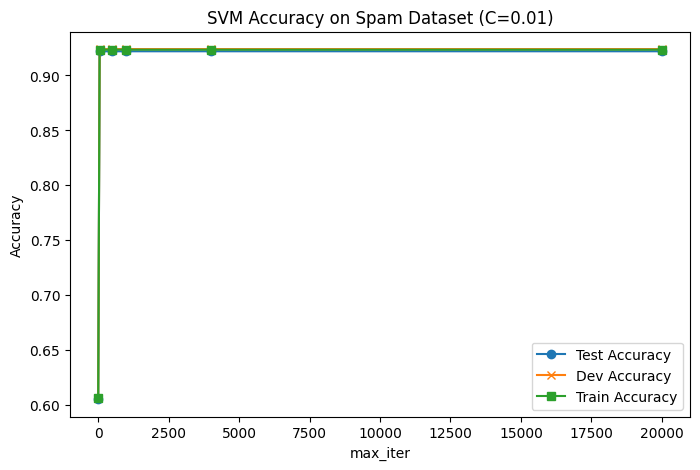

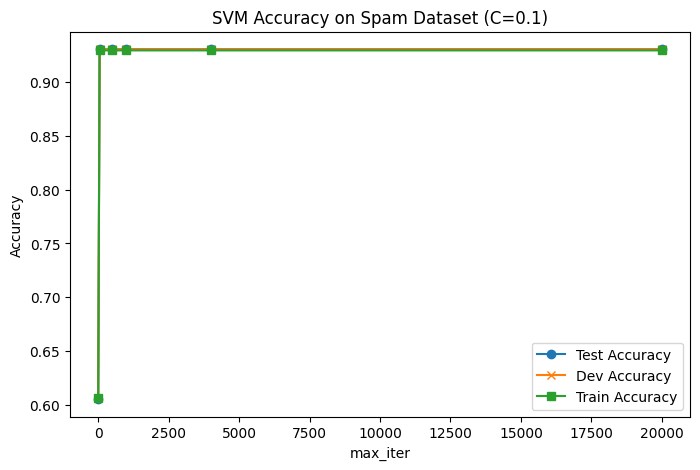

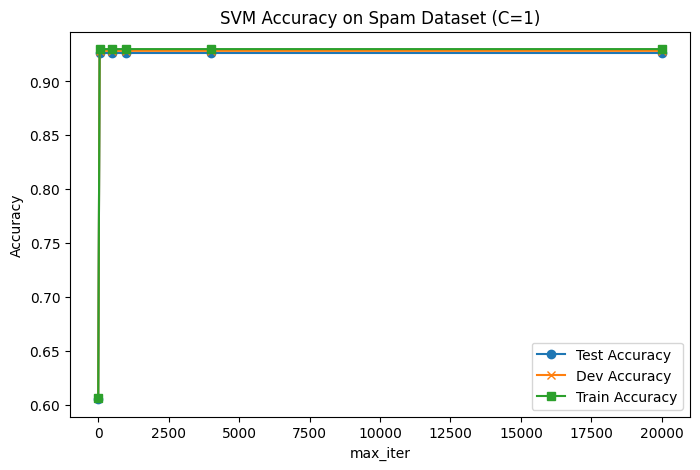

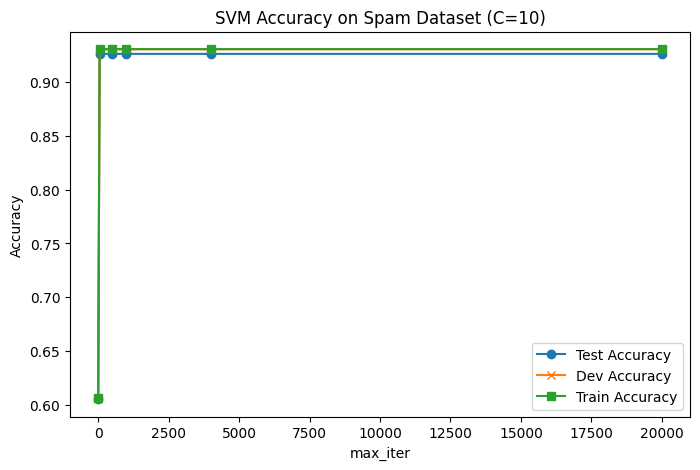

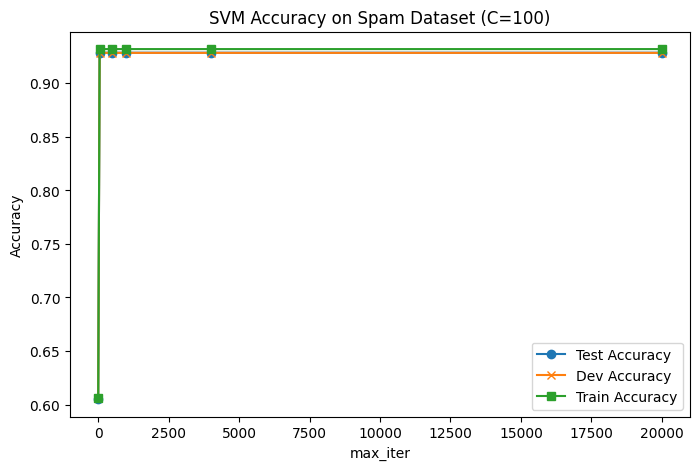

In [59]:
# Graph version

# Store results
results = {}

for C in [0.01, 0.1, 1, 10, 100]:
    results[C] = {"max_iter": [], "test_acc": [], "dev_acc": [], "train_acc": []}
    for max_iter in [0, 50, 500, 1000, 4000, 20000]:
        spam_SVM_model = LinearSVC(C=C, max_iter=max_iter)
        spam_SVM_model.fit(X_spam_train, Y_spam_train)

        Y_spam_pred_test = spam_SVM_model.predict(X_spam_test)
        Y_spam_pred_dev = spam_SVM_model.predict(X_spam_dev)
        Y_spam_pred_train = spam_SVM_model.predict(X_spam_train)

        # Store accuracies
        results[C]["max_iter"].append(max_iter)
        results[C]["test_acc"].append(accuracy_score(Y_spam_test, Y_spam_pred_test))
        results[C]["dev_acc"].append(accuracy_score(Y_spam_dev, Y_spam_pred_dev))
        results[C]["train_acc"].append(accuracy_score(Y_spam_train, Y_spam_pred_train))

# Plot
plt.figure(figsize=(10,6))
for C in results:
    plt.figure(figsize=(8,5))
    plt.plot(results[C]["max_iter"], results[C]["test_acc"], marker='o', linestyle= None, label="Test Accuracy")
    plt.plot(results[C]["max_iter"], results[C]["dev_acc"], marker='x', linestyle=None, label="Dev Accuracy")
    plt.plot(results[C]["max_iter"], results[C]["train_acc"], marker='s', linestyle=None, label="Train Accuracy")


    plt.xlabel("max_iter")
    plt.ylabel("Accuracy")
    plt.title(f"SVM Accuracy on Spam Dataset (C={C})")
    plt.legend()
    plt.show()


# Logistic Regression for SPAM dataset



In [60]:
# Training model using train set.
print("Logistic regression run on spam dataset-------------------------------")
for penalty in ['l1', 'l2']:
  print(f"----------------- Penalty: {penalty.upper()} Regularization -------------------------------------------------------")
  if penalty == 'l1':
    solver = 'liblinear'
  else:
    solver = 'lbfgs'
  for C in [0.01, 0.1, 1, 10, 100]:
    print(f"------------------- C = {C} -----------------")

    for max_iter in [0, 50, 500, 1000, 4000, 20000]:
      print(f"Model run for a maximum iteration of {max_iter}-----------------------")
      Spam_model = LogisticRegression(penalty = penalty, solver = solver, C=C, max_iter = max_iter)
      Spam_model.fit(X_spam_train, Y_spam_train)

      # Predict .
      Y_spam_train_prediction = Spam_model.predict(X_spam_train)
      Y_spam_dev_prediction = Spam_model.predict(X_spam_dev)
      Y_spam_test_prediction = Spam_model.predict(X_spam_test)
      print("Accuracy for train set", accuracy_score(Y_spam_train, Y_spam_train_prediction))
      print("Accuracy for development set", accuracy_score(Y_spam_dev, Y_spam_dev_prediction))
      print("Accuracy for test set", accuracy_score(Y_spam_test, Y_spam_test_prediction))
      # Get the confusion matrix
      print("Confusion Matrix for test set\n", confusion_matrix(Y_spam_test, Y_spam_test_prediction))
      print()

Logistic regression run on spam dataset-------------------------------
----------------- Penalty: L1 Regularization -------------------------------------------------------
------------------- C = 0.01 -----------------
Model run for a maximum iteration of 0-----------------------
Accuracy for train set 0.6059782608695652
Accuracy for development set 0.6065217391304348
Accuracy for test set 0.6052060737527115
Confusion Matrix for test set
 [[279   0]
 [182   0]]

Model run for a maximum iteration of 50-----------------------
Accuracy for train set 0.8654891304347826
Accuracy for development set 0.8391304347826087
Accuracy for test set 0.8590021691973969
Confusion Matrix for test set
 [[251  28]
 [ 37 145]]

Model run for a maximum iteration of 500-----------------------
Accuracy for train set 0.8654891304347826
Accuracy for development set 0.8391304347826087
Accuracy for test set 0.8590021691973969
Confusion Matrix for test set
 [[251  28]
 [ 37 145]]

Model run for a maximum iteration 

/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Accuracy for train set 0.9203804347826087
Accuracy for development set 0.9282608695652174
Accuracy for test set 0.9197396963123644
Confusion Matrix for test set
 [[263  16]
 [ 21 161]]

Model run for a maximum iteration of 20000-----------------------
Accuracy for train set 0.9203804347826087
Accuracy for development set 0.9282608695652174
Accuracy for test set 0.9197396963123644
Confusion Matrix for test set
 [[263  16]
 [ 21 161]]

------------------- C = 1 -----------------
Model run for a maximum iteration of 0-----------------------
Accuracy for train set 0.6059782608695652
Accuracy for development set 0.6065217391304348
Accuracy for test set 0.6052060737527115
Confusion Matrix for test set
 [[279   0]
 [182   0]]

Model run for a maximum iteration of 50-----------------------
Accuracy for train set 0.9326086956521739
Accuracy for development set 0.9282608695652174
Accuracy for test set 0.928416485900217
Confusion Matrix for test set
 [[265  14]
 [ 19 163]]

Model run for a maximu

/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Accuracy for train set 0.9304347826086956
Accuracy for development set 0.9260869565217391
Accuracy for test set 0.9240780911062907
Confusion Matrix for test set
 [[265  14]
 [ 21 161]]

Model run for a maximum iteration of 500-----------------------
Accuracy for train set 0.9304347826086956
Accuracy for development set 0.9260869565217391
Accuracy for test set 0.9240780911062907
Confusion Matrix for test set
 [[265  14]
 [ 21 161]]

Model run for a maximum iteration of 1000-----------------------
Accuracy for train set 0.9304347826086956
Accuracy for development set 0.9260869565217391
Accuracy for test set 0.9240780911062907
Confusion Matrix for test set
 [[265  14]
 [ 21 161]]

Model run for a maximum iteration of 4000-----------------------
Accuracy for train set 0.9304347826086956
Accuracy for development set 0.9260869565217391
Accuracy for test set 0.9240780911062907
Confusion Matrix for test set
 [[265  14]
 [ 21 161]]

Model run for a maximum iteration of 20000--------------------

/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

Accuracy for train set 0.9301630434782608
Accuracy for development set 0.9260869565217391
Accuracy for test set 0.9240780911062907
Confusion Matrix for test set
 [[265  14]
 [ 21 161]]

Model run for a maximum iteration of 20000-----------------------
Accuracy for train set 0.9301630434782608
Accuracy for development set 0.9260869565217391
Accuracy for test set 0.9240780911062907
Confusion Matrix for test set
 [[265  14]
 [ 21 161]]

----------------- Penalty: L2 Regularization -------------------------------------------------------
------------------- C = 0.01 -----------------
Model run for a maximum iteration of 0-----------------------
Accuracy for train set 0.39402173913043476
Accuracy for development set 0.3934782608695652
Accuracy for test set 0.3947939262472885
Confusion Matrix for test set
 [[  0 279]
 [  0 182]]

Model run for a maximum iteration of 50-----------------------
Accuracy for train set 0.8872282608695652
Accuracy for development set 0.8804347826086957
Accuracy for

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Accuracy for train set 0.9222826086956522
Accuracy for development set 0.9260869565217391
Accuracy for test set 0.9240780911062907
Confusion Matrix for test set
 [[263  16]
 [ 19 163]]

Model run for a maximum iteration of 1000-----------------------
Accuracy for train set 0.9228260869565217
Accuracy for development set 0.9304347826086956
Accuracy for test set 0.9262472885032538
Confusion Matrix for test set
 [[263  16]
 [ 18 164]]

Model run for a maximum iteration of 4000-----------------------
Accuracy for train set 0.9228260869565217
Accuracy for development set 0.9304347826086956
Accuracy for test set 0.9262472885032538
Confusion Matrix for test set
 [[263  16]
 [ 18 164]]

Model run for a maximum iteration of 20000-----------------------
Accuracy for train set 0.9228260869565217
Accuracy for development set 0.9304347826086956
Accuracy for test set 0.9262472885032538
Confusion Matrix for test set
 [[263  16]
 [ 18 164]]

------------------- C = 1 -----------------
Model run for a 

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Accuracy for train set 0.9296195652173913
Accuracy for development set 0.9304347826086956
Accuracy for test set 0.9240780911062907
Confusion Matrix for test set
 [[264  15]
 [ 20 162]]

Model run for a maximum iteration of 1000-----------------------


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy for train set 0.9328804347826087
Accuracy for development set 0.9304347826086956
Accuracy for test set 0.9240780911062907
Confusion Matrix for test set
 [[263  16]
 [ 19 163]]

Model run for a maximum iteration of 4000-----------------------
Accuracy for train set 0.9323369565217391
Accuracy for development set 0.9282608695652174
Accuracy for test set 0.9240780911062907
Confusion Matrix for test set
 [[263  16]
 [ 19 163]]

Model run for a maximum iteration of 20000-----------------------
Accuracy for train set 0.9323369565217391
Accuracy for development set 0.9282608695652174
Accuracy for test set 0.9240780911062907
Confusion Matrix for test set
 [[263  16]
 [ 19 163]]

------------------- C = 10 -----------------
Model run for a maximum iteration of 0-----------------------
Accuracy for train set 0.39402173913043476
Accuracy for development set 0.3934782608695652
Accuracy for test set 0.3947939262472885
Confusion Matrix for test set
 [[  0 279]
 [  0 182]]

Model run for a m

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Accuracy for train set 0.9301630434782608
Accuracy for development set 0.9304347826086956
Accuracy for test set 0.9197396963123644
Confusion Matrix for test set
 [[262  17]
 [ 20 162]]

Model run for a maximum iteration of 1000-----------------------


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy for train set 0.9331521739130435
Accuracy for development set 0.9260869565217391
Accuracy for test set 0.93058568329718
Confusion Matrix for test set
 [[264  15]
 [ 17 165]]

Model run for a maximum iteration of 4000-----------------------
Accuracy for train set 0.9315217391304348
Accuracy for development set 0.9282608695652174
Accuracy for test set 0.9262472885032538
Confusion Matrix for test set
 [[265  14]
 [ 20 162]]

Model run for a maximum iteration of 20000-----------------------
Accuracy for train set 0.9315217391304348
Accuracy for development set 0.9282608695652174
Accuracy for test set 0.9262472885032538
Confusion Matrix for test set
 [[265  14]
 [ 20 162]]

------------------- C = 100 -----------------
Model run for a maximum iteration of 0-----------------------
Accuracy for train set 0.39402173913043476
Accuracy for development set 0.3934782608695652
Accuracy for test set 0.3947939262472885
Confusion Matrix for test set
 [[  0 279]
 [  0 182]]

Model run for a ma

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Accuracy for train set 0.9339673913043478
Accuracy for development set 0.9304347826086956
Accuracy for test set 0.928416485900217
Confusion Matrix for test set
 [[263  16]
 [ 17 165]]

Model run for a maximum iteration of 1000-----------------------


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy for train set 0.9309782608695653
Accuracy for development set 0.9282608695652174
Accuracy for test set 0.9219088937093276
Confusion Matrix for test set
 [[263  16]
 [ 20 162]]

Model run for a maximum iteration of 4000-----------------------


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy for train set 0.9307065217391305
Accuracy for development set 0.9304347826086956
Accuracy for test set 0.9240780911062907
Confusion Matrix for test set
 [[265  14]
 [ 21 161]]

Model run for a maximum iteration of 20000-----------------------
Accuracy for train set 0.9307065217391305
Accuracy for development set 0.9260869565217391
Accuracy for test set 0.9240780911062907
Confusion Matrix for test set
 [[265  14]
 [ 21 161]]



/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF 

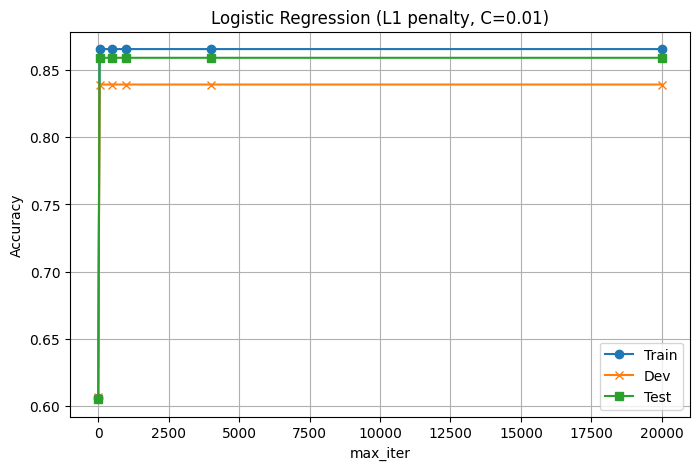

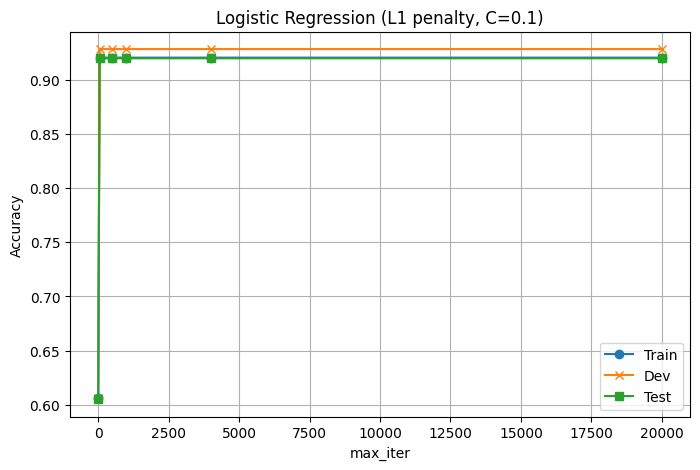

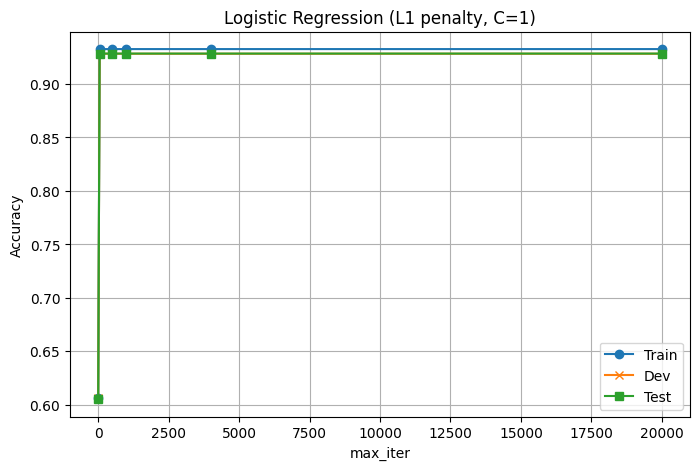

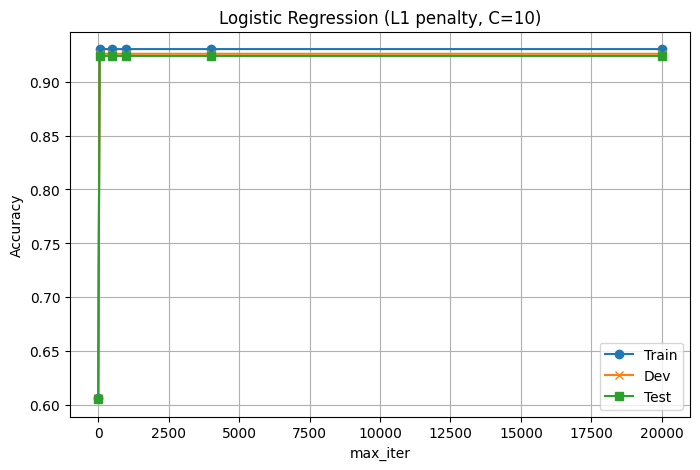

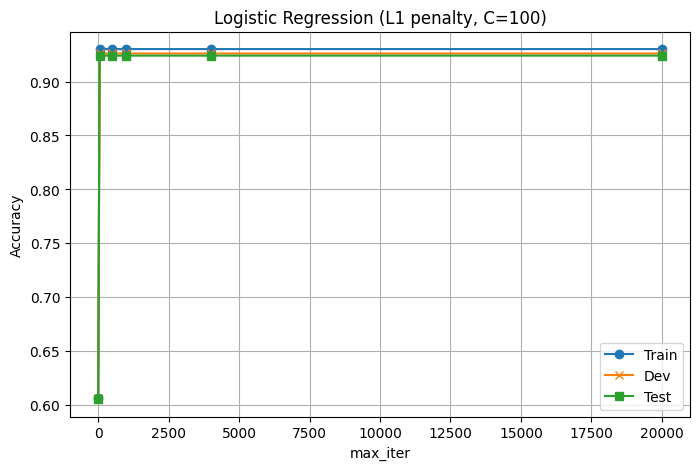

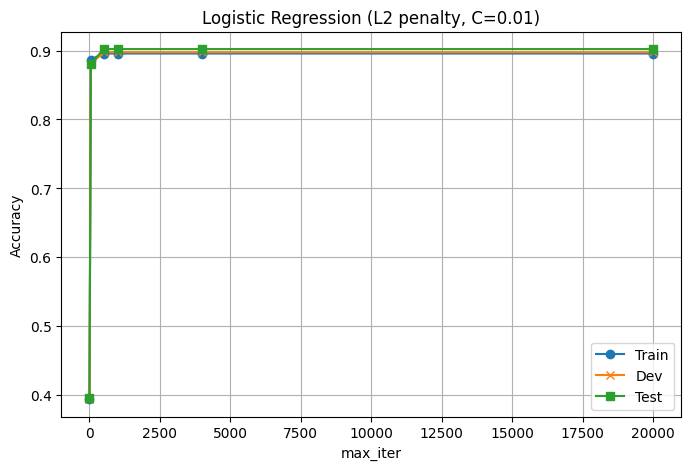

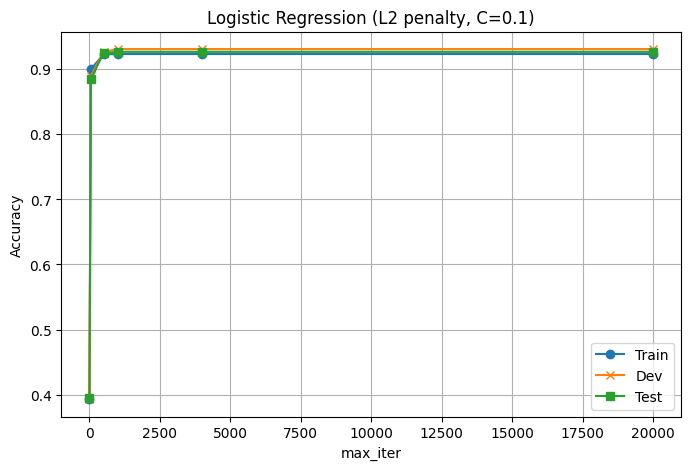

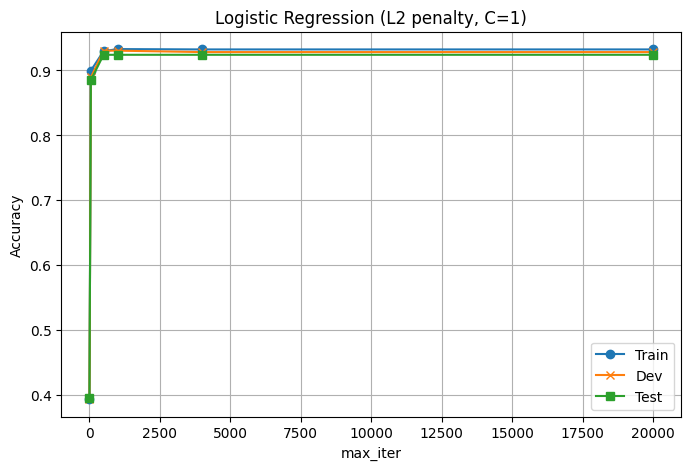

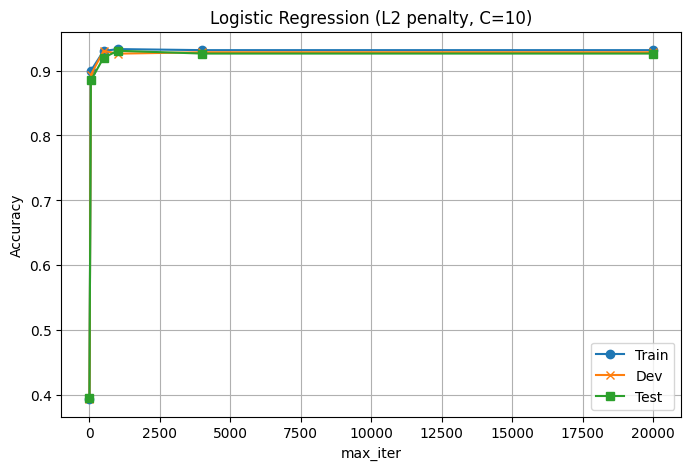

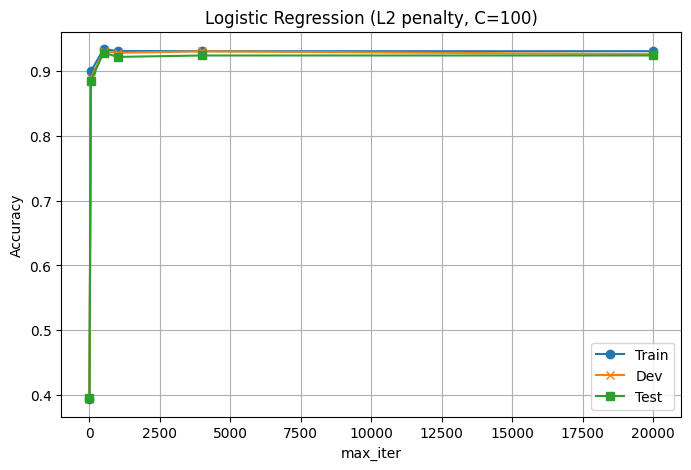

In [61]:

# Graph version
results = {"l1": {}, "l2": {}}

for penalty in ['l1', 'l2']:
    solver = 'liblinear' if penalty == 'l1' else 'lbfgs'
    results[penalty] = {}

    for C in [0.01, 0.1, 1, 10, 100]:
        results[penalty][C] = {"max_iter": [], "train_acc": [], "dev_acc": [], "test_acc": []}

        for max_iter in [0, 50, 500, 1000, 4000, 20000]:
            model = LogisticRegression(penalty=penalty, solver=solver, C=C, max_iter=max_iter)
            model.fit(X_spam_train, Y_spam_train)

            Y_train_pred = model.predict(X_spam_train)
            Y_dev_pred = model.predict(X_spam_dev)
            Y_test_pred = model.predict(X_spam_test)

            # Store accuracies
            results[penalty][C]["max_iter"].append(max_iter)
            results[penalty][C]["train_acc"].append(accuracy_score(Y_spam_train, Y_train_pred))
            results[penalty][C]["dev_acc"].append(accuracy_score(Y_spam_dev, Y_dev_pred))
            results[penalty][C]["test_acc"].append(accuracy_score(Y_spam_test, Y_test_pred))

# Plot separate graphs for each penalty
for penalty in ['l1', 'l2']:
    for C in results[penalty]:
        plt.figure(figsize=(8, 5))
        plt.plot(results[penalty][C]["max_iter"], results[penalty][C]["train_acc"], marker='o', label='Train')
        plt.plot(results[penalty][C]["max_iter"], results[penalty][C]["dev_acc"], marker='x', label='Dev')
        plt.plot(results[penalty][C]["max_iter"], results[penalty][C]["test_acc"], marker='s', label='Test')
        plt.xlabel("max_iter")
        plt.ylabel("Accuracy")
        plt.title(f"Logistic Regression ({penalty.upper()} penalty, C={C})")
        plt.legend()
        plt.grid(True)
        plt.show()


# Perceptron model

In [62]:
# using 1 and -1 makes updating the math cleaner
# -1 moves weights towards x and 1 away from it.
def classify(weights, bias, x):
    total = np.dot(weights, x) + bias
    return 1 if total > 0 else -1

In [63]:
def unison_shuffled_copies(a, b):
    # the function ensures the X and Y are suffled in the same order.
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return a[p], b[p]

In [64]:
def perceptron_train(X, y, num_epochs):
    # this initializes the weights and bias to 0's
    weights = np.zeros( X.shape[1] )
    bias = 0
    for epoch in range(num_epochs):
        X, y = unison_shuffled_copies(X, y)  # shuffle each epoch
        for i in range(X.shape[0]):
            total = np.dot(weights, X[i]) + bias
            if total * y[i] <= 0: # means its been misclassified, hence why using 1 and -1 is good for this comparison
                weights += y[i] * X[i]
                bias += y[i]
    return weights, bias

# this runs the test set to get the accuracy.
def run_tests(weights, bias, X, y):
    preds = np.array([classify(weights, bias, x) for x in X])
    total_correct = np.sum(preds == y)
    accuracy = total_correct / y.shape[0]
    return accuracy, preds

## Perceptron Model used for SPAM dataset

In [65]:
# This converts labels
X_spam_train_new = X_spam_train.to_numpy()
X_spam_dev_new   = X_spam_dev.to_numpy()
X_spam_test_new  = X_spam_test.to_numpy()

Y_spam_train_new = np.where(Y_spam_train.to_numpy() == 1, 1, -1)
Y_spam_dev_new   = np.where(Y_spam_dev.to_numpy() == 1, 1, -1)
Y_spam_test_new  = np.where(Y_spam_test.to_numpy() == 1, 1, -1)

In [66]:
print("Perceptron model run on SPAM dataset-------------------------------------")
for num_epoches in [0, 500, 1000, 5000, 7000]:
  print(f"Model run for a {num_epoches} epoches")
  weights, bias = perceptron_train(X_spam_train_new, Y_spam_train_new, num_epochs = num_epoches)
  spam_train_accuracy, spam_pred_train = run_tests(weights, bias, X_spam_train_new, Y_spam_train_new)
  spam_dev_accuracy, spam_pred_dev = run_tests(weights, bias, X_spam_dev_new, Y_spam_dev_new)
  spam_test_accuracy, spam_pred_test = run_tests(weights, bias, X_spam_test_new, Y_spam_test_new)

  print(f"Train set accuracy: {spam_train_accuracy}")
  print(f"Development set accuracy: {spam_dev_accuracy}")
  print(f"Test set accuracy: {spam_test_accuracy}")

  # Confusion Matrix for Spam
  # Get the acutal labels of 0 and 1, instead of 1 and -1 that i did before
  y_true_binary = np.where(Y_spam_test_new == -1, 0, 1)
  y_pred_binary = np.where(spam_pred_test == -1, 0, 1)

  print("Confusion Matrix\n:", confusion_matrix(y_true_binary, y_pred_binary))
  print()

Perceptron model run on SPAM dataset-------------------------------------
Model run for a 0 epoches
Train set accuracy: 0.6059782608695652
Development set accuracy: 0.6065217391304348
Test set accuracy: 0.6052060737527115
Confusion Matrix
: [[279   0]
 [182   0]]

Model run for a 500 epoches
Train set accuracy: 0.8815217391304347
Development set accuracy: 0.8565217391304348
Test set accuracy: 0.8741865509761388
Confusion Matrix
: [[233  46]
 [ 12 170]]

Model run for a 1000 epoches
Train set accuracy: 0.9122282608695652
Development set accuracy: 0.9021739130434783
Test set accuracy: 0.913232104121475
Confusion Matrix
: [[257  22]
 [ 18 164]]

Model run for a 5000 epoches
Train set accuracy: 0.8684782608695653
Development set accuracy: 0.8565217391304348
Test set accuracy: 0.8546637744034707
Confusion Matrix
: [[220  59]
 [  8 174]]

Model run for a 7000 epoches
Train set accuracy: 0.9114130434782609
Development set accuracy: 0.908695652173913
Test set accuracy: 0.9154013015184381
Confu

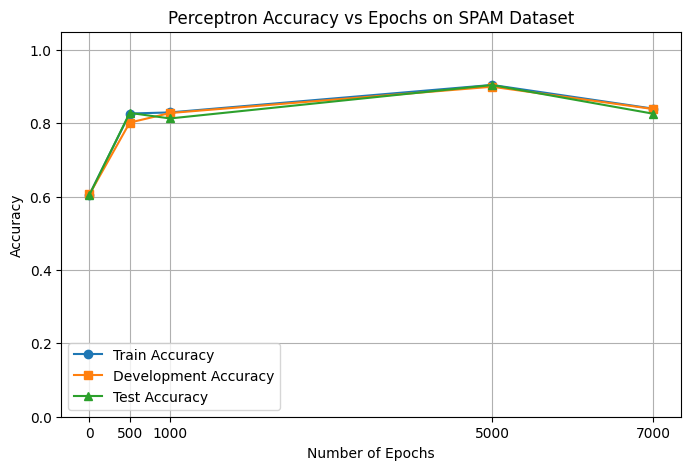

In [67]:
# Graph version

epochs_list = [0, 500, 1000, 5000, 7000]

# Store accuracies
train_acc_list = []
dev_acc_list = []
test_acc_list = []

for num_epochs in epochs_list:
    weights, bias = perceptron_train(X_spam_train_new, Y_spam_train_new, num_epochs=num_epochs)
    spam_train_accuracy, _ = run_tests(weights, bias, X_spam_train_new, Y_spam_train_new)
    spam_dev_accuracy, _ = run_tests(weights, bias, X_spam_dev_new, Y_spam_dev_new)
    spam_test_accuracy, _ = run_tests(weights, bias, X_spam_test_new, Y_spam_test_new)

    train_acc_list.append(spam_train_accuracy)
    dev_acc_list.append(spam_dev_accuracy)
    test_acc_list.append(spam_test_accuracy)

# Plotting
plt.figure(figsize=(8,5))
plt.plot(epochs_list, train_acc_list, marker='o', label='Train Accuracy')
plt.plot(epochs_list, dev_acc_list, marker='s', label='Development Accuracy')
plt.plot(epochs_list, test_acc_list, marker='^', label='Test Accuracy')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.title('Perceptron Accuracy vs Epochs on SPAM Dataset')
plt.xticks(epochs_list)
plt.ylim(0, 1.05)
plt.legend()
plt.grid(True)
plt.show()

## Perceptron model used for Language database.


In [68]:
# Turning the Y labels for our language dataset into 1 and -1 for the perceptron model.
Y_language_train_new = np.where(y_train == 1, 1, -1)
Y_language_dev_new   = np.where(y_dev == 1, 1, -1)
Y_language_test_new  = np.where(y_test == 1, 1, -1)

In [69]:
# Train the model (Bag-of-Words only)
print("Perceptron model run on Bag-of-Words dataset------------------------")
for num_epoches in [0, 500, 1000, 5000, 7000]:
  print(f"Model run for {num_epoches} epochs")
  weights, bias = perceptron_train(X_train_lang_vec, Y_language_train_new, num_epochs=num_epoches)

  # Evaluate on train/dev/test
  train_accuracy, train_preds = run_tests(weights, bias, X_train_lang_vec, Y_language_train_new)
  dev_accuracy, dev_preds     = run_tests(weights, bias, X_dev_lang_vec, Y_language_dev_new)
  test_accuracy, test_preds   = run_tests(weights, bias, X_test_lang_vec, Y_language_test_new)

  print(f"Train accuracy: {train_accuracy}")
  print(f"Development accuracy: {dev_accuracy}")
  print(f"Test accuracy: {test_accuracy}")
  print("Test confusion matrix:\n", confusion_matrix(Y_language_test_new, test_preds))
  print()


Perceptron model run on Bag-of-Words dataset------------------------
Model run for 0 epochs
Train accuracy: 0.5072463768115942
Development accuracy: 0.5
Test accuracy: 0.5
Test confusion matrix:
 [[20  0]
 [20  0]]

Model run for 500 epochs
Train accuracy: 1.0
Development accuracy: 0.95
Test accuracy: 0.95
Test confusion matrix:
 [[20  0]
 [ 2 18]]

Model run for 1000 epochs
Train accuracy: 1.0
Development accuracy: 0.875
Test accuracy: 0.825
Test confusion matrix:
 [[20  0]
 [ 7 13]]

Model run for 5000 epochs
Train accuracy: 1.0
Development accuracy: 0.875
Test accuracy: 0.85
Test confusion matrix:
 [[20  0]
 [ 6 14]]

Model run for 7000 epochs
Train accuracy: 1.0
Development accuracy: 0.9
Test accuracy: 0.9
Test confusion matrix:
 [[20  0]
 [ 4 16]]



Perceptron model run on Bag-of-Words dataset------------------------
Model run for 0 epochs
Model run for 500 epochs
Model run for 1000 epochs
Model run for 5000 epochs
Model run for 7000 epochs


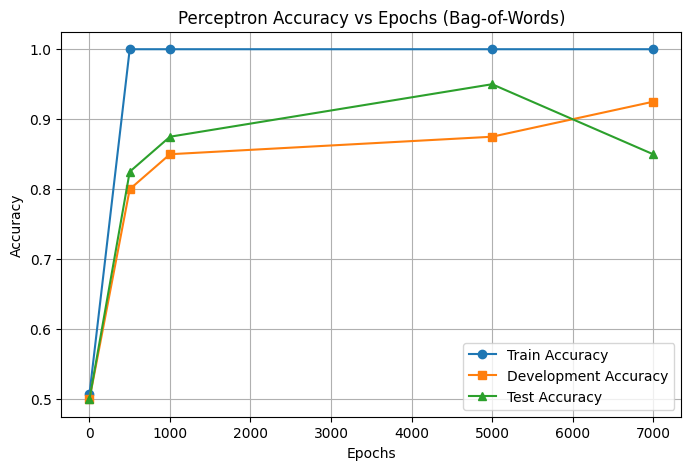

In [70]:
# Graph version of bag of words
epochs_list = [0, 500, 1000, 5000, 7000]
train_accs, dev_accs, test_accs = [], [], []

print("Perceptron model run on Bag-of-Words dataset------------------------")
for num_epoches in epochs_list:
    print(f"Model run for {num_epoches} epochs")
    weights, bias = perceptron_train(X_train_lang_vec, Y_language_train_new, num_epochs=num_epoches)

    # Evaluate on train/dev/test
    train_accuracy, train_preds = run_tests(weights, bias, X_train_lang_vec, Y_language_train_new)
    dev_accuracy, dev_preds     = run_tests(weights, bias, X_dev_lang_vec, Y_language_dev_new)
    test_accuracy, test_preds   = run_tests(weights, bias, X_test_lang_vec, Y_language_test_new)

    # Store results
    train_accs.append(train_accuracy)
    dev_accs.append(dev_accuracy)
    test_accs.append(test_accuracy)

# Plot accuracy vs epochs
plt.figure(figsize=(8, 5))
plt.plot(epochs_list, train_accs, marker='o', label='Train Accuracy')
plt.plot(epochs_list, dev_accs, marker='s', label='Development Accuracy')
plt.plot(epochs_list, test_accs, marker='^', label='Test Accuracy')
plt.title("Perceptron Accuracy vs Epochs (Bag-of-Words)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

In [71]:
# Train the model
print("Perceptron model run on dutch and english dataset------------------------")
for num_epoches in [0, 500, 1000, 5000, 7000]:
  print(f"Model run for a {num_epoches} epoches")
  weights, bias = perceptron_train(X_train_combined, Y_language_train_new, num_epochs=num_epoches)

  # Evaluate on train/dev/test
  train_accuracy, train_preds = run_tests(weights, bias, X_train_combined, Y_language_train_new)
  dev_accuracy, dev_preds     = run_tests(weights, bias, X_dev_combined, Y_language_dev_new)
  test_accuracy, test_preds   = run_tests(weights, bias, X_test_combined, Y_language_test_new)

  print(f"Train accuracy: {train_accuracy}")
  print(f"Development accuracy: {dev_accuracy}")
  print(f"Test accuracy: {test_accuracy}")
  print("Test confusion matrix:\n", confusion_matrix(Y_language_test_new, test_preds))
  print()

Perceptron model run on dutch and english dataset------------------------
Model run for a 0 epoches
Train accuracy: 0.5072463768115942
Development accuracy: 0.5
Test accuracy: 0.5
Test confusion matrix:
 [[20  0]
 [20  0]]

Model run for a 500 epoches
Train accuracy: 1.0
Development accuracy: 0.875
Test accuracy: 0.875
Test confusion matrix:
 [[20  0]
 [ 5 15]]

Model run for a 1000 epoches
Train accuracy: 1.0
Development accuracy: 0.875
Test accuracy: 0.975
Test confusion matrix:
 [[20  0]
 [ 1 19]]

Model run for a 5000 epoches
Train accuracy: 1.0
Development accuracy: 0.85
Test accuracy: 0.8
Test confusion matrix:
 [[19  1]
 [ 7 13]]

Model run for a 7000 epoches
Train accuracy: 1.0
Development accuracy: 0.9
Test accuracy: 0.875
Test confusion matrix:
 [[20  0]
 [ 5 15]]



Perceptron model run on dutch and english dataset------------------------


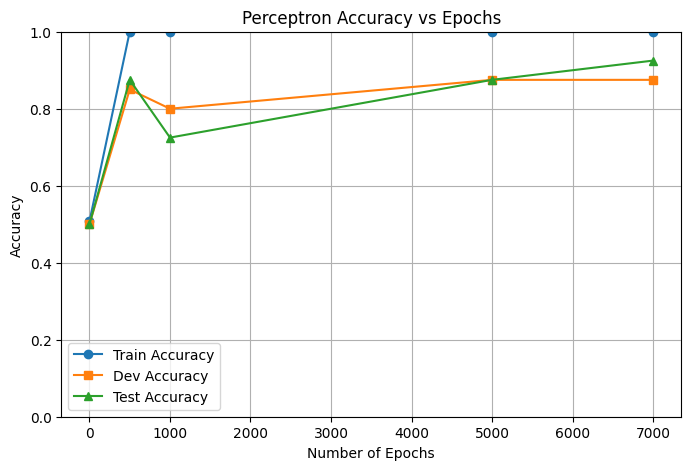

In [72]:
# graph version
num_epochs_list = [0, 500, 1000, 5000, 7000]

train_accs = []
dev_accs = []
test_accs = []

print("Perceptron model run on dutch and english dataset------------------------")
for num_epoches in num_epochs_list:
    weights, bias = perceptron_train(X_train_combined, Y_language_train_new, num_epochs=num_epoches)

    # Evaluate on train/dev/test
    train_accuracy, train_preds = run_tests(weights, bias, X_train_combined, Y_language_train_new)
    dev_accuracy, dev_preds     = run_tests(weights, bias, X_dev_combined, Y_language_dev_new)
    test_accuracy, test_preds   = run_tests(weights, bias, X_test_combined, Y_language_test_new)

    # Store for plotting
    train_accs.append(train_accuracy)
    dev_accs.append(dev_accuracy)
    test_accs.append(test_accuracy)

# Plotting
plt.figure(figsize=(8,5))
plt.plot(num_epochs_list, train_accs, marker='o', label='Train Accuracy')
plt.plot(num_epochs_list, dev_accs, marker='s', label='Dev Accuracy')
plt.plot(num_epochs_list, test_accs, marker='^', label='Test Accuracy')
plt.title("Perceptron Accuracy vs Epochs")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.ylim(0,1)
plt.grid(True)
plt.legend()
plt.show()
